In [1]:
import pandas as pd
import re
import seaborn as sns
from tqdm import tqdm_notebook 

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Text preprocessing

In [2]:
train_data = pd.read_csv('train_dataset_train.csv')

In [3]:
train_data

,id,Текст Сообщения,Тематика,Ответственное лицо,Категория
0,2246,Помогите начальник Льговского рэс не реагирует...,"Нарушения, связанные с содержанием электросети...",Администрация Льговского района,3
1,380,<p>По фасаду дома по адресу ул. Урицкого 22 пр...,Аварийные деревья,Администрация города Курска,3
2,2240,Агресивные собаки. На радуге там стая из подро...,Безнадзорные животные,Администрация города Курска,1
3,596,<p>На пересечении &nbsp;улиц Сосновская и Бере...,Нескошенная сорная растительность в местах общ...,Комитет дорожного хозяйства города Курска,3
4,1797,<p style=`text-align:justify;`><span style=`ba...,Аварийные деревья,Комитет городского хозяйства города Курска,3
...,...,...,...,...,...
1995,1356,<p>22.12.21 в вечернее время появилась вонь от...,Неприятные запахи,Комитет природных ресурсов Курской области,16
1996,243,<p>Добрый день! Хочу сообщить о такой проблеме...,Парковки на дорогах в границах городских округ...,Администрация города Курска,0
1997,2350,Состоят 3 засохшие дерева (2 большие берёзы и...,Аварийные деревья,Администрация города Курска,3
1998,1937,"Пожалуйста роман Владимирович, в скором времен...",Нарушение дорожного покрытия (ямы) на дорогах...,Администрация города Курска,0


In [30]:
train_data['Категория'].unique()

array([ 3,  1, 16,  0,  6,  8,  4, 13, 10, 11, 14,  7,  5, 15,  2,  9, 12])

<AxesSubplot:xlabel='Категория', ylabel='count'>

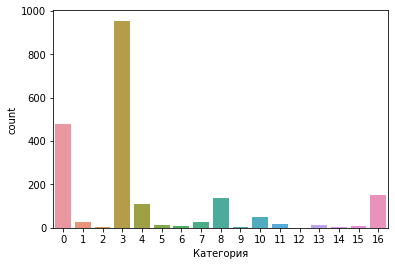

In [5]:
sns.countplot(x='Категория', data=train_data)

In [6]:
len(train_data[train_data['Категория']==3])

954

In [7]:
MAX_LEN_DATA = 954

## Text augmentation

In [8]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as naf

from nlpaug.util import Action

In [9]:
text = 'Помогите начальник Льговского рэс не реагирует на жалобы, а мы как малейший ветер сидим без света, а именно в деревне большие угоны улица старая слобода. Пожалуйста помогите, пускай вычистит и фотоотчет сделает'

In [10]:
aug_test = naw.ContextualWordEmbsAug(
    model_path='DeepPavlov/rubert-base-cased', action="substitute")
augmented_text = aug_test.augment(text, n=3)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
Помогите начальник Льговского рэс не реагирует на жалобы, а мы как малейший ветер сидим без света, а именно в деревне большие угоны улица старая слобода. Пожалуйста помогите, пускай вычистит и фотоотчет сделает
Augmented Text:
['Помогите начальник Льговского рэс отдела реагирует через условия, а понимаем как малейший двор сидим без света, а именно этой деревне большие угоны была старая слобода. Пожалуйста помогите, компанию вычистит на фотоотчет проведет', 'Помогите начальник Да рэс всегда реагирует на ветер, а мы с малейший ветер сидим без транспорта, зачастую именно в сдаче в угоны улица старая улица. Пожалуйста помогите, пускай вычистит ваш фотоотчет сделает', 'Помогите начальник Льговского СИЗО УК реагирует все жалобы, а мы как малейший ветер сидим без машин, а именно в наиболее большие угоны улица Липецкая слобода. Пожалуйста будут, пускай вычистит камеры следить будут']


In [11]:
augment_df = pd.DataFrame(data=[], columns=['text', 'tema', 'bailee', 'categories'])

In [12]:
for num_classes in tqdm_notebook(range(17)):
    if num_classes != 3:
        temp = train_data[train_data['Категория']==num_classes]
        count_aug = int(round((MAX_LEN_DATA - len(temp))/len(temp),0))
        temp_df = pd.DataFrame(data=[], columns=['text', 'tema', 'bailee', 'categories'])
        list_new_text = []
        for idx in range(len(temp)):
            str_temp = temp.iloc()[idx]        
            temp_df['text'] = aug_test.augment(str_temp['Текст Сообщения'], n=count_aug)
            temp_df['categories'] = str_temp['Категория']
            temp_df['tema'] = str_temp['Тематика']
            temp_df['bailee'] = str_temp['Ответственное лицо']
            augment_df = pd.concat([augment_df, temp_df])       
    

/tmp/ipykernel_6711/1619865902.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for num_classes in tqdm_notebook(range(17)):


  0%|          | 0/17 [00:00<?, ?it/s]

In [13]:
augment_df

,text,tema,bailee,categories
0,< p > Добрый день. & nbsp ; < / p > < p > по о...,Пешеходные переходы на дорогах в границах горо...,Комитет природных ресурсов Курской области,0
0,"Напомним, в д. Старый Свет уже 3 дня не чистят...",Очистка от снега и наледи дорог в границах гор...,Администрация Железногорского района,0
0,< p > Детский день. просят помощи в решении на...,Нарушение дорожного покрытия (ямы) на дорогах...,Комитет городского хозяйства города Курска,0
0,< 380 > Минска & 2 ; < / en >,Нарушение дорожного покрытия (ямы) на дорогах...,Комитет дорожного хозяйства города Курска,0
0,< p > Добрый день. Сегодня 17. 08. 2021 напрот...,Пешеходные переходы на дорогах в границах горо...,Комитет дорожного хозяйства города Курска,0
...,...,...,...,...
0,< p > 23. 05. 2001 в вечернее выходной готовит...,Неприятные запахи,Комитет природных ресурсов Курской области,16
1,< p > 22. 11. 52 с 6 окно — очистка от Грибной...,Неприятные запахи,Комитет природных ресурсов Курской области,16
2,< е > 13. 11. 21 в вечернее время прошла вонь ...,Неприятные запахи,Комитет природных ресурсов Курской области,16
3,< p > 07. 12. 21 в вечернее время – дата по во...,Неприятные запахи,Комитет природных ресурсов Курской области,16


In [21]:
augment_df = augment_df[augment_df['categories'] != 3]

In [49]:
train_data.iloc()[0]['Текст Сообщения']

'Помогите начальник Льговского рэс не реагирует на жалобы, а мы как малейший ветер сидим без света, а именно в деревне большие угоны улица старая слобода. Пожалуйста помогите, пускай вычистит и фотоотчет сделает'

In [24]:
augment_df.to_csv('train_aug_bert_model.csv', index=False)

In [15]:
train_data_new = train_data[['Текст Сообщения', 'Тематика', 'Ответственное лицо', 'Категория']]

In [16]:
train_data_new.columns = ['text', 'tema', 'bailee', 'categories']

In [22]:
train = pd.concat([train_data_new, augment_df])

<AxesSubplot:xlabel='categories', ylabel='count'>

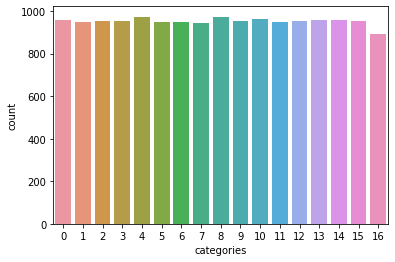

In [23]:
sns.countplot(x='categories', data=train)

In [25]:
train

,text,tema,bailee,categories
0,Помогите начальник Льговского рэс не реагирует...,"Нарушения, связанные с содержанием электросети...",Администрация Льговского района,3
1,<p>По фасаду дома по адресу ул. Урицкого 22 пр...,Аварийные деревья,Администрация города Курска,3
2,Агресивные собаки. На радуге там стая из подро...,Безнадзорные животные,Администрация города Курска,1
3,<p>На пересечении &nbsp;улиц Сосновская и Бере...,Нескошенная сорная растительность в местах общ...,Комитет дорожного хозяйства города Курска,3
4,<p style=`text-align:justify;`><span style=`ba...,Аварийные деревья,Комитет городского хозяйства города Курска,3
...,...,...,...,...
0,< p > 23. 05. 2001 в вечернее выходной готовит...,Неприятные запахи,Комитет природных ресурсов Курской области,16
1,< p > 22. 11. 52 с 6 окно — очистка от Грибной...,Неприятные запахи,Комитет природных ресурсов Курской области,16
2,< е > 13. 11. 21 в вечернее время прошла вонь ...,Неприятные запахи,Комитет природных ресурсов Курской области,16
3,< p > 07. 12. 21 в вечернее время – дата по во...,Неприятные запахи,Комитет природных ресурсов Курской области,16


## Token Analise

In [26]:
from transformers import BertTokenizer, BertModel
import torch
from torch import nn
import transformers

In [27]:
tokenizer = BertTokenizer.from_pretrained(pretrained_model_name_or_path='DeepPavlov/rubert-base-cased')

In [28]:
def get_token_len(x):
    x = tokenizer.encode_plus(x,
                          add_special_tokens=True,
                          max_length=512,
                          return_token_type_ids=False,
                          pad_to_max_length=False,
                          return_attention_mask=False,
                          truncation=True
                          )
    return len(x['input_ids'])

In [29]:
train['count_tokens'] = train.text.apply(get_token_len)

/home/odin/anaconda3/envs/torch2/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count_tokens', ylabel='Density'>

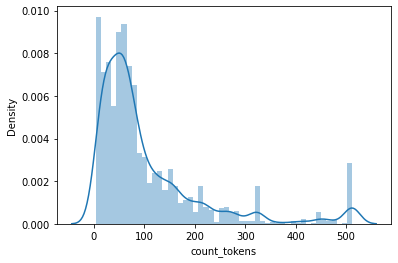

In [30]:
sns.distplot(train['count_tokens'])

In [31]:
max(train['count_tokens'])

512